In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [ ]:
uber_df = pd.read_csv('My Uber Drives - 2016.csv')
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
uber_df.shape

(1156, 7)

In [ ]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#There is only one numerical variable 'Miles'. Hence, uber_df.describe() wil not be of great use

In [ ]:
uber_df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
uber_df.dropna(axis=0, subset=['PURPOSE*'], inplace=True )

In [ ]:
uber_df.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

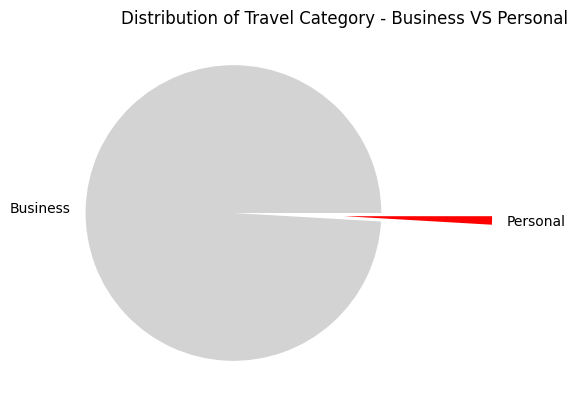

In [ ]:
uber_df['CATEGORY*'].value_counts().plot(kind='pie', labels=['Business', 'Personal'], ylabel='', title='Distribution of Travel Category - Business VS Personal', explode=[0.75,0], colors=['#D3D3D3','#FF0000'])
plt.show()

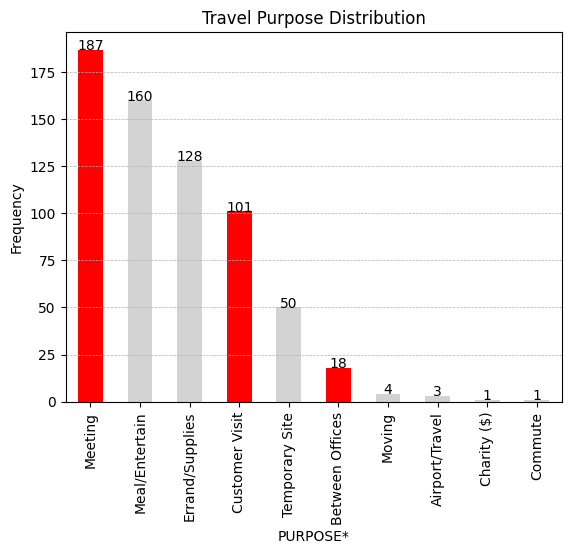

In [ ]:
temp_purpose = uber_df['PURPOSE*'].value_counts()
purpose_colors = ['#FF0000','#D3D3D3','#D3D3D3','#FF0000','#D3D3D3','#FF0000','#D3D3D3','#D3D3D3','#D3D3D3','#D3D3D3',]
temp_purpose.plot(kind='bar', color=purpose_colors)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
for i in range(len(temp_purpose)):
  plt.text(i, temp_purpose[i], temp_purpose[i], ha='center')
plt.ylabel('Frequency')
plt.title('Travel Purpose Distribution')
plt.show()

In [ ]:
#uber_df[['START_DATE', 'START_TIME']] = uber_df['START_DATE*'].str.split(' ', expand=True)
#uber_df[['START_HOUR','START_MIN']] = uber_df['START_TIME'].str.split(':', expand=True)
#uber_df[['START_MONTH','START_DATE', 'START_YEAR']] = uber_df['START_DATE'].str.split('-', expand=True)
#uber_df.head()

In [ ]:
#uber_df.drop(columns=['START_TIME'], axis=1, inplace=True)

In [ ]:
#uber_df.isna().sum()

In [ ]:
uber_df['START_DATE*'] = uber_df['START_DATE*'].str.replace('/','-')
uber_df[['START_DATE', 'START_TIME']] = uber_df['START_DATE*'].str.split(' ', expand=True)
uber_df[['START_HOUR','START_MIN']] = uber_df['START_TIME'].str.split(':', expand=True)
uber_df[['START_MONTH','START_DATE', 'START_YEAR']] = uber_df['START_DATE'].str.split('-', expand=True)
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME,START_HOUR,START_MIN,START_MONTH,START_YEAR
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,01,21:11,21,11,01,2016
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,02,20:25,20,25,01,2016
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,05,17:31,17,31,01,2016
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,06,14:42,14,42,01,2016
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,06,17:15,17,15,01,2016


In [ ]:
uber_df['START_YEAR'].unique()

array(['2016'], dtype=object)

In [ ]:
uber_df['START_DATE'].unique()

array(['01', '02', '05', '06', '07', '10', '11', '12', '13', '14', '15',
       '18', '19', '20', '21', '26', '27', '28', '29', '30', '04', '08',
       '09', '16', '17', '22', '24', '25', '03', '31', '23'], dtype=object)

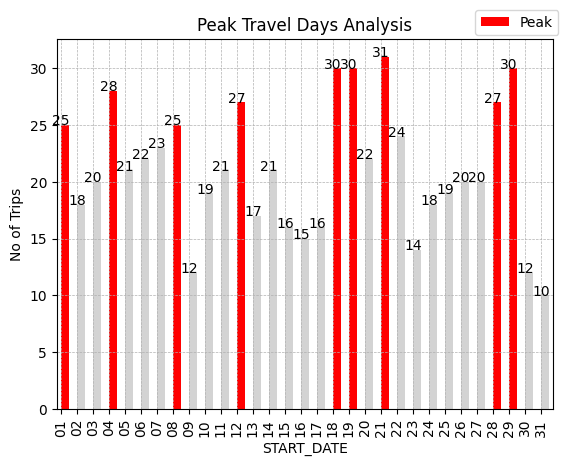

In [ ]:

sorted_values = uber_df['START_DATE'].value_counts().sort_index()
colors = ['#FF0000' if i >=25 else "#D3D3D3" for i in sorted_values.values]
sorted_values.plot(kind='bar', color=colors, align='edge')
plt.grid(linestyle = '--', linewidth = 0.5)
for i in range(len(sorted_values)):
  plt.text(i, sorted_values[i], sorted_values[i], ha='center')
plt.ylabel('No of Trips')
plt.title('Peak Travel Days Analysis')
plt.legend(['Peak', 'Non_Peak'], bbox_to_anchor=(1.025, 1.099), ncol=2)

plt.show()

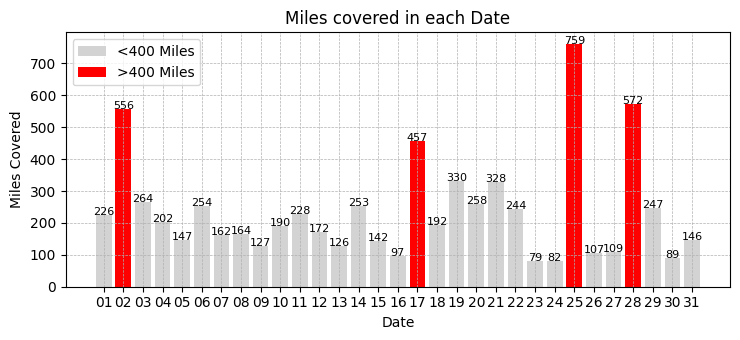

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

daily_miles = uber_df.groupby('START_DATE')['MILES*'].sum()
colors = ['#FF0000' if i >=400 else "#D3D3D3" for i in daily_miles.values]
bars = plt.bar(daily_miles.index, daily_miles.values, align='center', width=0.8, color=colors)

for i in range(len(daily_miles)):
  plt.text(i, daily_miles[i], round(daily_miles[i]), ha='center', fontsize=8)

plt.xlabel('Date')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.ylabel('Miles Covered')
plt.title('Miles covered in each Date')
spacing = 0.200
fig.subplots_adjust(bottom=spacing)

plt.legend(bars, ['<400 Miles','>400 Miles'], loc='upper left')
plt.show()

In [ ]:
uber_df.drop(columns=['START_YEAR','START_MIN'], axis=1, inplace=True)


In [ ]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME,START_HOUR,START_MONTH
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,01,21:11,21,01
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,02,20:25,20,01
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,05,17:31,17,01
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,06,14:42,14,01
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,06,17:15,17,01


In [ ]:
#Calculate Miles per hour
#See the avg speed in each hour of the dayy
#Peak hour for travel
#Peak hour for long distance
#WHich month has more long distance rides
#Which month has more travel

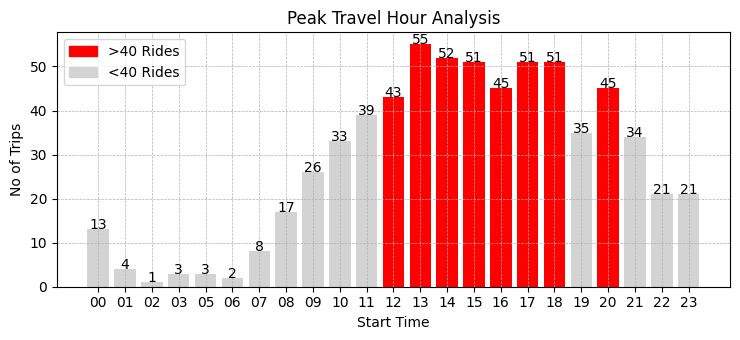

In [ ]:
import matplotlib.patches as mpatches

uber_df['START_HOUR'] = uber_df['START_HOUR'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)

peak_hour_plot = uber_df['START_HOUR'].value_counts().sort_index()

fig = plt.figure()

colors = ['#FF0000' if i >=40 else "#D3D3D3" for i in peak_hour_plot.values]

peak_hour_bar = plt.bar(peak_hour_plot.index, peak_hour_plot.values, align='center', color=colors)
plt.grid(linestyle = '--', linewidth = 0.5)

for i in range(len(peak_hour_plot)):
  plt.text(i, peak_hour_plot[i], peak_hour_plot[i], ha='center')

plt.xlabel('Start Time')
plt.ylabel('No of Trips')
plt.title('Peak Travel Hour Analysis')

# Creating legend with color box
pop_a = mpatches.Patch(color='#FF0000', label='>40 Rides')
pop_b = mpatches.Patch(color='#D3D3D3', label='<40 Rides')
plt.legend(handles=[pop_a,pop_b], loc='upper left')
plt.show()

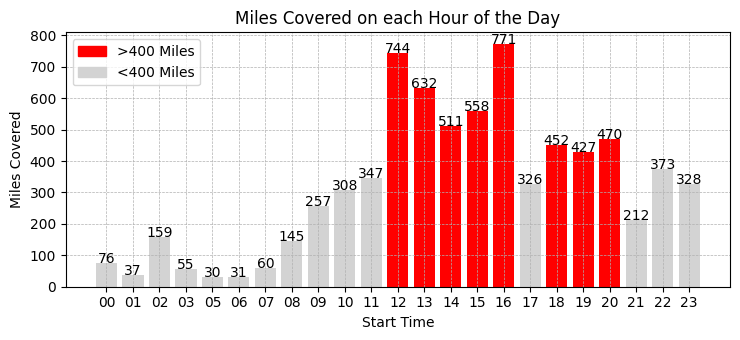

In [ ]:

#uber_df['START_HOUR'] = uber_df['START_HOUR'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)
hourly_miles = uber_df.groupby('START_HOUR')['MILES*'].sum()

colors = ['#FF0000' if i >=400 else "#D3D3D3" for i in hourly_miles.values]

plt.bar(hourly_miles.index, hourly_miles.values, align='center', color=colors)
plt.grid(linestyle = '--', linewidth = 0.5)

for i in range(len(hourly_miles)):
  plt.text(i, hourly_miles[i], round(hourly_miles[i]), ha='center')

plt.xlabel('Start Time')
plt.ylabel('Miles Covered')
plt.title('Miles Covered on each Hour of the Day')

# Creating legend with color box
pop_a = mpatches.Patch(color='#FF0000', label='>400 Miles')
pop_b = mpatches.Patch(color='#D3D3D3', label='<400 Miles')
plt.legend(handles=[pop_a,pop_b], loc='upper left')
plt.show()

In [ ]:
hourly_miles = uber_df.groupby('START_HOUR')['MILES*'].sum()
hourly_miles.values

array([ 75.7,  36.8, 159.3,  55.2,  30.5,  31.4,  60.4, 145.2, 256.7,
       308.3, 347.4, 743.8, 632.4, 511. , 558.1, 770.9, 325.8, 451.5,
       427.2, 470.2, 212. , 373.4, 328. ])

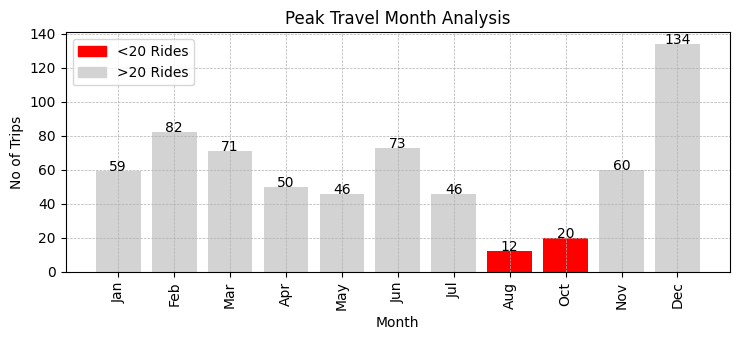

In [ ]:

uber_df['START_MONTH'] = uber_df['START_MONTH'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)

peak_month_plot = uber_df['START_MONTH'].value_counts().sort_index()

colors = ['#FF0000' if i <=20 else "#D3D3D3" for i in peak_month_plot.values]


ax = plt.bar(peak_month_plot.index, peak_month_plot.values,color=colors)
plt.grid(linestyle = '--', linewidth = 0.5)

for i in range(len(peak_month_plot)):
  plt.text(i, peak_month_plot[i], peak_month_plot[i], ha='center')

plt.xlabel('Month')
plt.ylabel('No of Trips')
plt.title('Peak Travel Month Analysis')
label_text = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec']
label_pos = np.arange(len(label_text))
plt.xticks(label_pos, label_text, rotation=90)

# Creating legend with color box
less_20 = mpatches.Patch(color='#FF0000', label='<20 Rides')
greater_20 = mpatches.Patch(color='#D3D3D3', label='>20 Rides')
plt.legend(handles=[less_20,greater_20], loc='upper left')
plt.show()

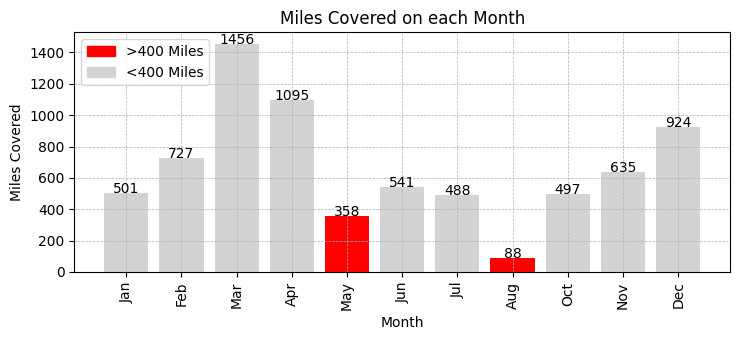

In [ ]:

#uber_df['START_HOUR'] = uber_df['START_HOUR'].apply(lambda x: x.zfill(2) if len(x) == 1 else x)
monthly_miles = uber_df.groupby('START_MONTH')['MILES*'].sum()

colors = ['#FF0000' if i <=400 else "#D3D3D3" for i in monthly_miles.values]

plt.bar(monthly_miles.index, monthly_miles.values, align='center', color=colors)
plt.grid(linestyle = '--', linewidth = 0.5)

for i in range(len(monthly_miles)):
  plt.text(i, monthly_miles[i], round(monthly_miles[i]), ha='center')

plt.xlabel('Month')
plt.ylabel('Miles Covered')
plt.title('Miles Covered on each Month')
plt.xticks(label_pos, label_text, rotation=90)


# Creating legend with color box
greater = mpatches.Patch(color='#FF0000', label='>400 Miles')
lesser = mpatches.Patch(color='#D3D3D3', label='<400 Miles')
plt.legend(handles=[greater,lesser], loc='upper left')
plt.show()

In [ ]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME,START_HOUR,START_MONTH
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,01,21:11,21,01
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,02,20:25,20,01
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,05,17:31,17,01
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,06,14:42,14,01
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,06,17:15,17,01


In [ ]:
uber_df['END_DATE*'] = uber_df['END_DATE*'].str.replace('/','-')
uber_df[['END_DATE', 'END_TIME']] = uber_df['END_DATE*'].str.split(' ', expand=True)
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_DATE,START_TIME,START_HOUR,START_MONTH,END_DATE,END_TIME
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,01,21:11,21,01,01-01-2016,21:17
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,02,20:25,20,01,01-02-2016,20:38
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,05,17:31,17,01,01-05-2016,17:45
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,06,14:42,14,01,01-06-2016,15:49
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,06,17:15,17,01,01-06-2016,17:19
